# Lista de Exercícios V

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 26/03/2021

In [1]:
import matplotlib.pyplot as plt
import numpy.random as rd
import vpython as vp
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>

## Problema 1

Sabe-se que a área de um círculo de raio unitário pode ser determinadado através da integral abaixo (em coordenadas cartesianas):

$$I=\int\int_{-1}^{+1}f(x,y)dx$$

onde $f(x,y)=1$ se $x^{2}+y^{2}\leq1$ e $f(x,y)=0$ caso contrário. Usando o método das médias, temos que:

$$<f>=\frac{1}{b-a}\int_{a}^{b}f(x)dx\implies\int_{a}^{b}f(x)dx=(b-a)<f>$$

$$\implies(b-a)<f>\approx\frac{(b-a)}{N}\sum_{i=1}^{N}f(x_{i})$$

Podemos generalizar o resultado acima para o nosso problema usando o valor do domínio da integral avaliado numa partição $\Pi$, ou seja:

$$\int\int_{-1}^{+1}f(x)dx=[1-(-1)]^{2}<f>\approx\frac{4}{N}\sum_{i=1}^{N}f(x_{i})$$

Dessa forma, generalizar o resultado para um número $n$ de dimensões, onde $n\in\mathbb{N}$ se torna trivial:

$$I=\int\ldots\int_{-1}^{+1}f(x_{1},\ldots,x_{n})dx_{1}\ldots dx_{n}=\int\ldots\int_{-1}^{+1}dx_{1}\ldots dx_{n}<f>$$

$$\therefore\text{ }\boxed{I\approx\frac{2^{n}}{N}\sum_{i=1}^{N}f(x_{i})}$$

Para o problema em questão, temos que o número de dimensões será $n=10$. Poderíamos generalizar ainda mais o nosso resultado para um intervalo qualquer $[a,b]$, bastaríamos trocar os limites de integração pelos extremos de um intervalo fechado qualquer $[a,b]$ e desenvolver as integrais $n-$dimensionais, e para finalizar, aplicar o PIF (Princípio de Indução Finita) extendido para garantir a veracidade da equação em todos os reais.

Como esse não é o nosso objetivo aqui, não vamos demonstrar a generalização do resultado acima, mas ela pode ser encontrada no livro [Análise Real, vol. 3 - Análise Vetorial](https://impa.br/page-livros/analise-real-vol-3-analise-vetorial/) de autoria de Elon Lages Lima publicado pelo IMPA (Instituto de Matemática Pura e Aplicada) em 2016.

$\blacksquare$

Partindo para a parte computacional do problema, começamos definindo o número de pontos (um milhão) e o número de dimensões (dez):

In [2]:
N = 1000000
dim = 10

Definimos nossa função $f(x)$:

In [3]:
def f(x):
    r2 = np.zeros(x.shape[1],float)
    
    for xi in x:
        r2 += xi**2
        
    return r2 < 1

Definimos nosso $x$ de forma randômica:

In [4]:
x = rd.random((dim,N))*2 - 1

Agora calculamos a nossa integral $I$ aproximada:

In [5]:
fx = f(x)
I = 2**dim/N * np.sum(fx)

Por fim, calculamos a variância $\text{Var}$ e o desvio padrão $\sigma$, e em seguida printamos o resultado de nossa integral $I$:

In [6]:
var = np.sum(fx**2)/N-(np.sum(fx)/N**2)
sigma = 2**dim*np.sqrt(var/N)  

print('I = {} + {}'.format(I,sigma))

I = 2.583552 + 0.05143495506406856


$\blacksquare$

## Problema 2

### Letra a)

Considere a integral abaixo:

$$I=\int_{0}^{1}\frac{x^{-1/2}}{e^{x}+1}dx$$

Claramente essa integral diverge no ponto em $x=0$. É fácil ver que a desigualdade abaixo é válida para todo $x\in(0,1]$:

$$x^{-1/2}>\frac{x^{-1/2}}{e^{x}+1}\implies\int_{0}^{1}x^{-1/2}dx>\int_{0}^{1}\frac{x^{-1/2}}{e^{x}+1}dx>0$$

Sendo a integral da esquerda trivial, teremos então:

$$2>\int_{0}^{1}\frac{x^{-1/2}}{e^{x}+1}dx>0\implies I\in(0,2)$$

Portanto, temos que a integral $I$ converge para um número real contido no intervalo aberto $(0,2)$, ou seja, nossa integral é finita. 

Entretanto, o método de Monte Carlo com as médias pode resultar em valores bem maiores (de forma a sair do intervalo) ou tender para o infinito. Para solucionar tal problema, basta implementarmos uma média ponderada no lugar de uma média aritmética. Dessa forma, sendo $\omega(x)=x^{-1/2}$ nossa função peso e impondo a condição de que a integral definida no intervalo $[a,b]$ de $\omega(x)dx$ seja não nula, podemos escrever:

$$\int_{a}^{b}\omega(x)dx\neq0\implies<g>_{\omega}=\frac{\int_{a}^{b}\omega(x)g(x)dx}{\int_{a}^{b}\omega(x)dx}$$

Considere agora uma integral $I$ definida unidimensional de uma função $f(x)$ definida no intervalo $[a,b]$, definindo $g(x)$ como segue abaixo podemos escrever:

$$g(x)=\frac{f(x)}{\omega(x)}\implies\Bigg<\frac{f(x)}{\omega(x)}\Bigg>_{\omega}=\frac{\int_{a}^{b}f(x)dx}{\int_{a}^{b}\omega(x)dx}=\frac{I}{\int_{a}^{b}\omega(x)dx}\text{ }\therefore$$

$$\therefore\text{ }\boxed{I=\Bigg<\frac{f(x)}{\omega(x)}\Bigg>_{\omega}\int_{a}^{b}\omega(x)dx}$$

Seja $N$ a integral acima, temos que $N$ é um fator normalizante que obedece a seguinte equação:

$$p(x)=\frac{\omega(x)}{\int_{a}^{b}\omega(x)dx}\implies\int_{a}^{b}p(x)dx=1$$

Note que $p(x)$ é uma densidade de probabilidade, uma vez que a mesma obedece ao axioma probabilístico de Kolmogorov. Dessa forma, podemos escrever:

$$\omega(x)=x^{-1/2}\implies p(x)=\frac{1}{2\sqrt{x}}\text{ }\therefore$$

$$\therefore\text{ }\boxed{I\approx\frac{2}{N}\sum_{i=1}^{N}g(x_{i})}$$

onde os pontos $x_{i}$ são determinados conforme a distribuição de probabilidade $p(x)$ acima. Dessa forma, podemos facilmente concluir:

$$f(x)=\frac{x^{-1/2}}{e^{x}+1}\implies g(x)=\frac{1}{e^{x}+1}$$

$\blacksquare$

### Letra b)

Primeiramente, vamos definir as nossas constantes:

In [7]:
N = 10000000

z = rd.random(N)
x = z**2

Definimos agora a nossa função principal:

In [8]:
def g(x):
    return 1/(1+np.exp(x))

Finalmente, calculamos a integral desejada:

In [9]:
I = np.sum(g(x))/N*2

print('I = {}'.format(I))

I = 0.8389694264265737


$\blacksquare$

## Problema 3

### Letras a), b), d)

Vamos determinar a energia total do sistema que, para o sistema físico em questão é dado por:

$$\boxed{E=\sum_{<i,j>}s_{i}s_{j}}$$

Primeiramente, vamos determinar as constantes que iremos utilizar:

In [10]:
rd.seed(5)

N = 20
J = 1
T = 1
kb = 1
beta = 1
steps = 100000 # 0000

Vamos calcular os valores dos $s_{i}$ e $s_{j}$:

In [11]:
s = np.empty((N,N),int)

for i in range(N):
    for j in range(N):
        if rd.random() < 0.5:
            s[i,j]=1
        else:
            s[i,j]=-1

Agora implementamos uma função para determinar a energia dos pares de spins $s_{i}s_{j}$:

In [12]:
def energy(s):

    s1 = s[:-1,:]*s[1:,:]
    s2 = s[:,:-1]*s[:,1:]
    
    E = -J*(np.sum(s1) + np.sum(s2))
    
    return E

def energy_check(s):

    I = 0
    for i in range(N-1):
        for j in range(N):
            I+=s[i,j]*s[i+1,j]

    for i in range(N):
        for j in range(N-1):
            I+=s[i,j]*s[i,j+1]
        
    return -J*I

Agora vamos calcular a energia total do sistema:

In [13]:
eplot = []
Mplot = []
E1 = energy(s)
M = np.sum(s)

Por fim, vamos printar a energia total do sistema:

In [14]:
print('E =',E1, 'J')

E = -60 J


Calculamos os novos valores de $s_{i}s_{j}$:

In [15]:
for k in range(steps):
    i = rd.randint(N)
    j = rd.randint(N)

    s[i,j] *=-1

    E2 = energy(s)

    dE = E2 - E1
    # print(dE)

    if dE>0:
        if rd.random() < np.exp(-beta*dE):
            E1 = E2 
            M = np.sum(s)
        else:
            s[i,j ]*= -1
            # E1 = E2
    else:
        # Podemos flipar porque a energia decai
        E1 = E2 
        M = np.sum(s)
        
    # eplot.append(E1)
    Mplot.append(M)    

### Letra c)

Como de costume, definimos uma função para melhorar um pouco a estética dos plots:

In [16]:
def opt_plot():
    plt.grid(True, linestyle=":", color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=5, width=1, labelsize=15)
    plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8, width=1, labelsize=15)

Agora vamos plotar a magnetização total do sistema em função do tempo:

<IPython.core.display.Javascript object>


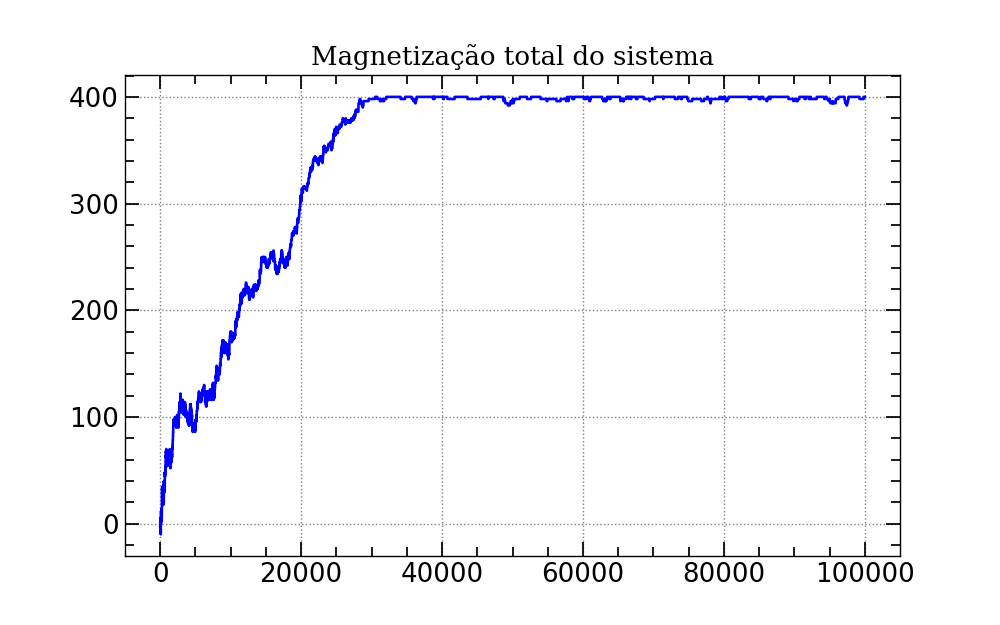

In [17]:
plt.figure(figsize=(8,5))

plt.plot(Mplot, color='blue')
plt.title('Magnetização total do sistema', family='serif', fontsize=15)
opt_plot()

### Letra e)

Como o ambiente do Jupyter não lida muito bem com animações, o código para executar uma animação do sistema físico em questão para as temperaturas $T=1$ e $T=2$ será exposto abaixo, entretanto, a célula não será executada, ao invés disso, será anexado um arquivo intitulado `ising_model_sim.py` que executará a animação do modelo em questão usando o pacote `vpython`.

In [ ]:
rd.seed(1)
# seed(5)

N = 20
J = 1
T = 1 # ou 2
kb = 1
beta = 1
steps = 100000 # 0000

s = np.empty((N,N),int)

for i in range(N):
    for j in range(N):
        if rd.random()<0.5:
            s[i,j]=1
        else:
            s[i,j]=-1
            
def energy(s):

    s1 = s[:-1,:]*s[1:,:]
    s2 = s[:,:-1]*s[:,1:]
    
    E = -J*(np.sum(s1) + np.sum(s2))
    
    return E

E1 = energy(s)
spin_repr = np.empty((N,N),vp.sphere)

for i in range(N):
    for j in range(N):
        spin_repr[i,j] = vp.sphere()
        spin_repr[i,j].pos = i-N//2,j-N//2,0
        
for k in range(steps):
    vp.rate(500)
    i = rd.randint(N)
    j = rd.randint(N)
    
    s[i,j] *=-1
    
    E2 = energy(s)
    
    dE = E2 - E1
    # print(dE)

    if dE >0 :
        if rd.random()< np.exp(-beta*dE):
            E1 = E2 # Podemos flipar os resultados
            M = np.sum(s)
        else:
            s[i,j]*=-1
    else:
        E1 = E2 # Podemos flipar os resultados porque a energia decai.

    if s[i,j]==1:
        spin_repr[i,j].color = vp.color.red
    else:
        spin_repr[i,j].color = vp.color.green

Podemos notar que a medida que a temperatura $T$ aumenta, o sistema se torna mais agitado ocasionando num aumento da magnetização do sistema e numa diminuição da energia (como já era esperado).

$\blacksquare$

## Problema 4

### Letra a)

Considere a função $f(x)=x^{2}-\cos{4\pi x}$. Graficamente, é fácil ver que essa função possui um mínimo global em $x=0$. Vamos confirmar isso usando recozimento simulado a partir de $x=2$. Vamos definir as constantes que iremos utilizar ao longo do problema:

In [18]:
Tmax = 1
Tmin = 1e-3
tau = 1e4
x0 = 2

Definimos nossa função `f(x)`:

In [19]:
def f(x):
    return x**2 - np.cos(4*np.pi*x)

Calculamos agora $f(x=2)$ e ajustamos nossa temperatura:

In [20]:
fx = f(x0)
t = 0
T = Tmax
x = x0

Agora uilizamos o esquema de resfriamento exponencial:

In [21]:
while T > Tmin:
    
    t += 1
    T = Tmax*np.exp(-t/tau)

    oldx = x
    oldfx = fx
    r = rd.standard_normal()
    x += r
    fx = f(x)

    delta_fx = fx - oldfx

    if rd.random()>np.exp(-delta_fx/T):
        x = oldx
        fx = oldfx

Vamos printar nosso resultado:

In [22]:
print('x = {} com f(x) = {}'.format(x,fx))

x = 0.002649884564156633 com f(x) = -0.9994386032715545


Note que nosso resultado para $x$ é bem próximo do valor esperado $(x=0)$.

### Letra b)

Vamos agora fazer o mesmo para a função $f(x)=\cos{x}+\cos{\sqrt{2}x}+\cos{\sqrt{3}x}$ no intervalo $x\in(0,50)$. Graficamente, é fácil notar que o mínimo global dessa função é em torno de $x=16$. Vamos usar o mesmo método usado no item anterior para confirmar isso.

Primeiramente, vamos plotar nossa função $f(x)$ para avaliar o seu comportamento e ter uma ideia da localização aproximada do mínimo global:

<IPython.core.display.Javascript object>


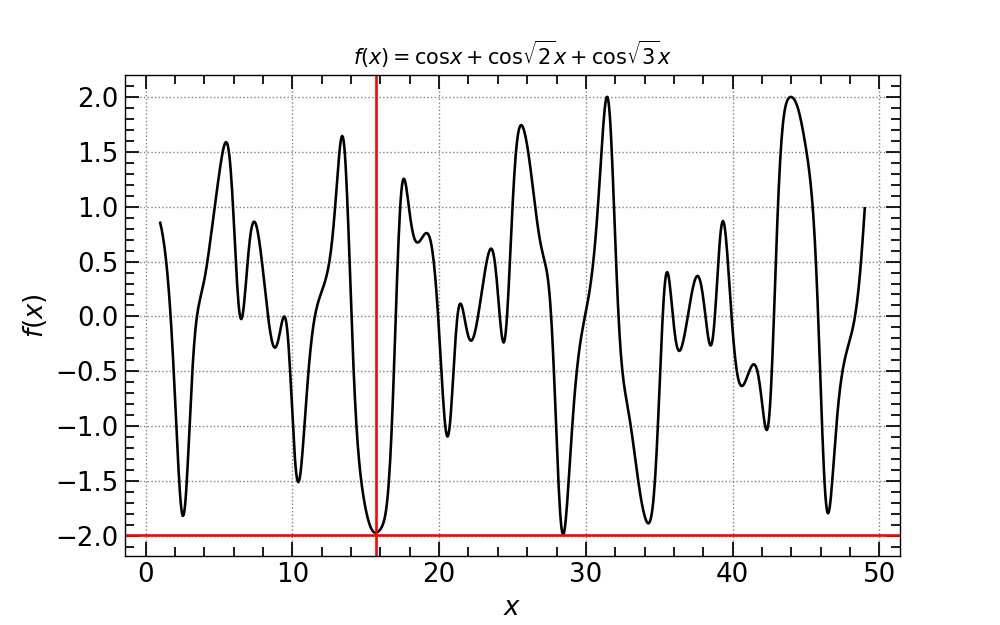

In [23]:
x_ = np.linspace(1,49,1000)
y = np.cos(x_) + np.cos(np.sqrt(2)*x_ + np.cos(np.sqrt(3)*x_))

plt.figure(figsize=(8,5))

plt.plot(x_,y, color='black')
plt.axvline(15.7, color = 'red')
plt.axhline(-1.99, color = 'red')
plt.title(r'$f(x)=\cos{x}+\cos{\sqrt{2}x}+\cos{\sqrt{3}x}$')
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$f(x)$', fontsize=15)
opt_plot()

Note que nosso mínimo global localiza-se no ponto $(x,y)\approx(15.7,-2.0)$ aproximadamente.

Primeiramente, definimos a nossa função `g(x)`:

In [24]:
def g(x):
    if x > 0 and x < 50:
        return np.cos(x) + np.cos(np.sqrt(2)*x + np.cos(np.sqrt(3)*x))
    else:
        return 1e10

Fazemos então o mesmo processo que foi feito no item anterior:

In [25]:
x0 = 1
gx = g(x0)
t = 0
x = x0
T = Tmax

while T > Tmin:
    
    t += 1
    T = Tmax*np.exp(-t/tau)

    oldx = x
    oldgx = gx
    r = rd.standard_normal()
    x += r
    gx = g(x)

    delta_gx = gx - oldgx

    if rd.random()>np.exp(-delta_gx/T):
        x = oldx
        gx = oldgx

Vamos printar nosso resultado:

In [26]:
print('x = {} com g(x) = {}'.format(x,gx))

x = 15.63840450349617 com g(x) = -1.9667940348558202


Note que nosso resultado bate o esperado $(x\approx15.7)$.

$\blacksquare$